In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules

## Vehicle crash worthiness
### Skope rules

In [27]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.6, "recall_min": 0.6}  # use F1-Score
classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
0: x1 <= 2.06748 and x4 <= 1.50849 --> (0.6185737976782753, 0.6819012797074955)
1: x2 > 1.65697 and x3 <= 2.76524 and x4 <= 1.48564 --> (0.6150159744408946, 0.7182835820895522)
2: x2 > 1.64585 and x4 <= 1.44283 --> (0.6106870229007634, 0.690846286701209)
3: x2 > 1.65709 and x3 <= 2.76524 and x4 <= 1.4856 --> (0.6105769230769231, 0.6803571428571429)
4: x2 > 1.918 and x4 <= 1.50904 --> (0.6006768189509306, 0.6454545454545455)


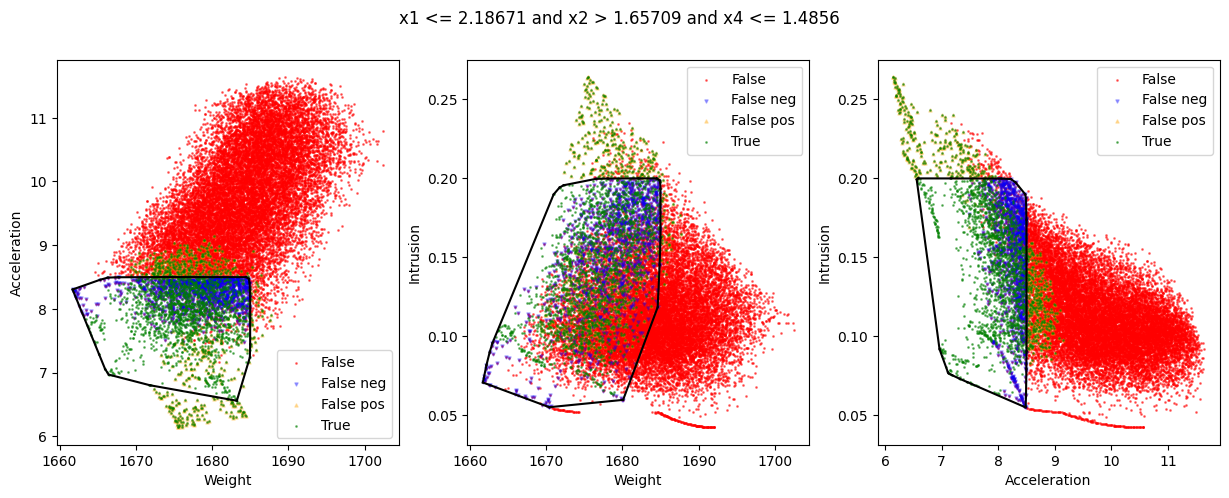

In [22]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_crash["skope_mark"] = df_crash.apply(con, axis=1)

plot_rule_explanations(df_crash, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [8]:
rulefit_kwargs = {"tree_size": 8}
classifier = train_rulefit_rules(df_crash, var_names, target_category, classifier_kwargs=rulefit_kwargs)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x4 <= 2.43383 --> (0.7263, 0.0668908275599302)
1: x4 <= 2.42816 --> (0.72375, 0.1732001352806778)
2: x4 <= 2.39698 --> (0.7081, 0.13864194728495252)
3: x4 <= 2.34996 --> (0.6831, 0.3899415855424855)
4: x4 > 2.55337 and x5 <= 2.14022 --> (0.12215, 0.18480582740295576)
5: x1 > 1.15977 and x2 > 1.06534 and x3 > 1.32196 and x4 > 2.56655 and x5 > 1.43567 --> (0.11945, 0.07321205298598608)
6: x3 > 1.30597 and x4 > 2.62048 and x5 > 1.44035 --> (0.11695, 0.0751962586674637)
7: x3 <= 1.61223 and x4 > 2.35301 --> (0.10155, 0.19492623079668328)
8: x3 <= 1.89211 and x4 > 2.5245 and x5 <= 2.33024 --> (0.0705, 0.16311378373029967)
9: x3 <= 2.01247 and x4 > 2.49587 and x5 <= 1.91987 --> (0.05805, 0.11944167804192517)
10: x1 <= 2.19694 and x3 <= 1.65641 and x4 > 2.43383 --> (0.05545, 0.07169076908795517)
11: x4 > 2.52359 and x5 <= 1.44142 --> (0.05115, 0.11058209706511643)
12: x1 <= 2.83423 and x3 <= 1.63062 and x4 > 2.47857 and x5 <= 2.21726 --> (0.0466, 0.0018612913

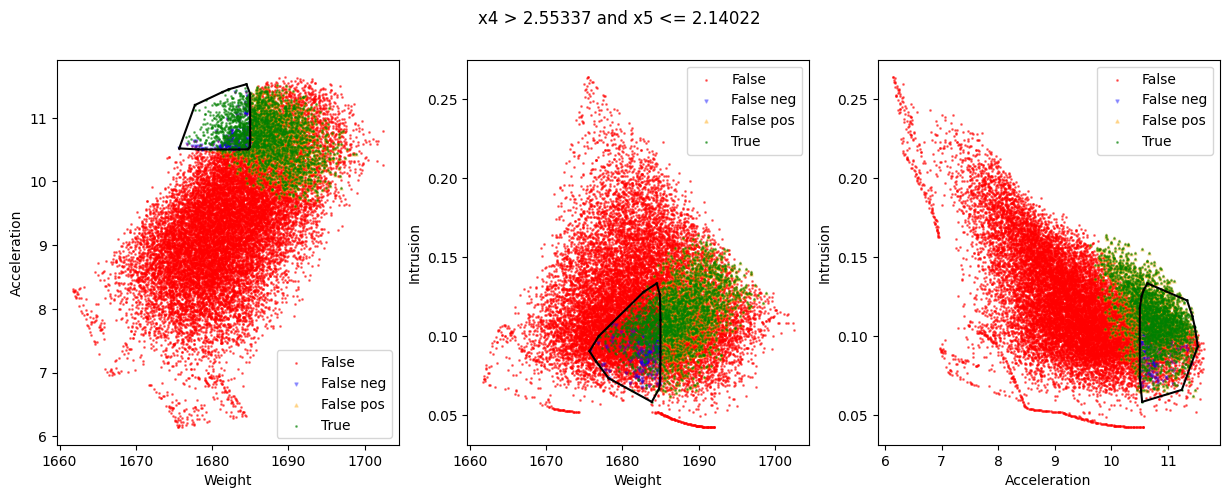

In [9]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_crash["mark"] = df_crash.apply(con, axis=1)

plot_rule_explanations(df_crash, obj_names, "mark", "category", target_category, title=rule)

## Two-Bar Truss
### Skope-rules

In [6]:
df_twobar, var_names, obj_names = label_two_bar_truss("../data/TwoBarTruss.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_twobar, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
0: x1 <= 0.00286 and x2 <= 0.00546 and x2 > 0.00177 --> (0.6612903225806451, 0.8118811881188119)
1: x1 <= 0.00283 and x2 <= 0.0055 and x2 > 0.00177 --> (0.6518518518518519, 0.8123076923076923)
2: x1 <= 0.00303 and x2 <= 0.00529 and x2 > 0.00177 --> (0.648578811369509, 0.789308176100629)
3: x1 <= 0.00261 and x2 <= 0.00546 and x2 > 0.00177 --> (0.6253602305475504, 0.7022653721682848)
4: x1 <= 0.00286 and x2 <= 0.00528 --> (0.5251046025104602, 0.7675840978593272)
5: x1 <= 0.00299 and x2 <= 0.00546 --> (0.503921568627451, 0.8538205980066446)


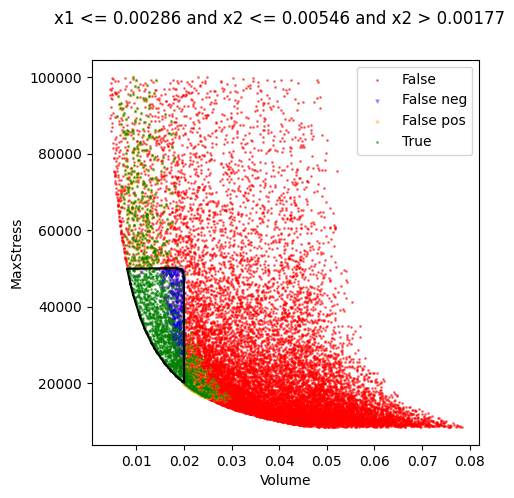

In [7]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_twobar["skope_mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [8]:
classifier = train_rulefit_rules(df_twobar, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 0.00191 --> (0.840027700831025, 0.1905035614576079)
1: x1 > 0.00223 --> (0.8070175438596491, 0.027698345955616443)
2: x1 > 0.00263 --> (0.7665050784856879, 0.0334780601762381)
3: x1 > 0.00346 --> (0.6748614958448753, 0.1509585467046605)
4: x1 > 0.00353 --> (0.6678208679593721, 0.007577479414804801)
5: x1 > 0.00369 --> (0.6502192982456141, 0.06625264730415038)
6: x1 > 0.00377 --> (0.6420244690674054, 0.9179304804373449)
7: x2 > 0.00497 --> (0.5475530932594644, 0.010534021405084873)
8: x1 <= 0.00323 and x2 <= 0.00602 and x2 > 0.00176 --> (0.14768005540166204, 0.14629198899870408)
9: x1 <= 0.0028 and x2 <= 0.00656 and x2 > 0.00173 --> (0.13867728531855955, 0.00405698953265838)
10: x1 <= 0.00304 and x2 <= 0.00579 and x2 > 0.00171 --> (0.13192520775623268, 0.012556648423423735)
11: x1 <= 0.00256 and x1 > 0.00089 and x2 <= 0.00694 and x2 > 0.00177 --> (0.10861034164358264, 0.1811201469018332)
12: x1 <= 0.00281 and x1 > 0.00071 and x2 <= 0.00542 and x2 >

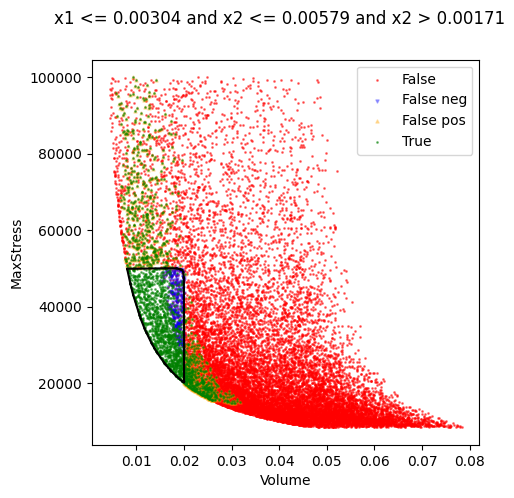

In [9]:
rule = rules[10][0]

con = rule_to_conditions(rule)
df_twobar["mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "mark", "category", target_category, title=rule)

## Welded beam
### Skope rules

In [16]:
df_beam, var_names, obj_names = label_welded_beam("../data/WeldedBeam.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_beam, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
0: x1 > 3.58537 and x2 > 7.95461 and x3 > 4.55323 --> (1.0, 0.5)
1: x1 > 3.58537 and x2 > 7.83145 and x3 > 4.65433 --> (0.9545454545454546, 0.6)
2: x1 > 3.52736 and x2 <= 9.85065 and x2 > 8.14444 --> (0.72, 0.5)
3: x1 > 3.58537 and x2 > 6.49649 --> (0.6511627906976745, 0.8484848484848485)
4: x1 > 3.58537 and x2 > 6.78372 --> (0.5416666666666666, 0.5777777777777777)
5: x1 > 3.58537 and x2 > 8.14641 --> (0.52, 0.5909090909090909)
6: x1 <= 4.14469 and x1 > 3.52736 and x2 > 6.49649 and x4 > 4.12949 --> (0.5142857142857142, 0.5294117647058824)


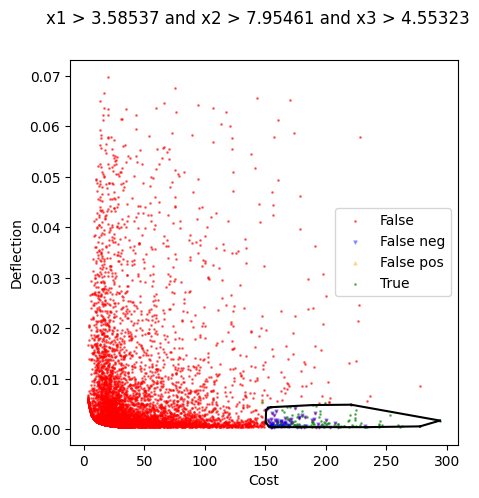

In [17]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_beam["skope_mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [12]:
classifier = train_rulefit_rules(df_beam, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x3 <= 9.96566 and x4 > 1.23583 --> (0.9054831869130566, 0.11339505749857476)
1: x4 > 1.94768 --> (0.8704937897606786, 0.15866489009017867)
2: x4 > 2.01433 --> (0.861102696152681, 0.012350827265248415)
3: x2 > 0.93479 and x4 > 1.8426 --> (0.8376249621326871, 0.23479238218721654)
4: x4 > 2.25245 --> (0.82747652226598, 0.49861310770127715)
5: x2 > 2.12027 --> (0.8206604059375947, 0.46747217151573617)
6: x1 > 0.44968 and x2 > 1.98277 and x4 <= 1.85732 --> (0.062859739472887, 0.21987901926387007)
7: x4 <= 2.01433 and x4 > 1.63092 --> (0.049833383823083915, 0.12874772896101522)
8: x2 <= 3.01445 and x4 <= 1.99683 --> (0.047712814298697365, 0.05760698137538546)
9: x2 > 2.10656 and x4 <= 1.46807 --> (0.04695546803998788, 0.0134811958591172)
10: x3 > 7.42007 and x4 <= 1.5106 and x4 > 0.62711 --> (0.04316873674644047, 0.2173006919035414)
11: x2 <= 9.51202 and x3 > 8.01998 and x4 <= 1.56376 and x4 > 0.57656 --> (0.04271432899121479, 0.06500669311510138)
12: x1 > 0

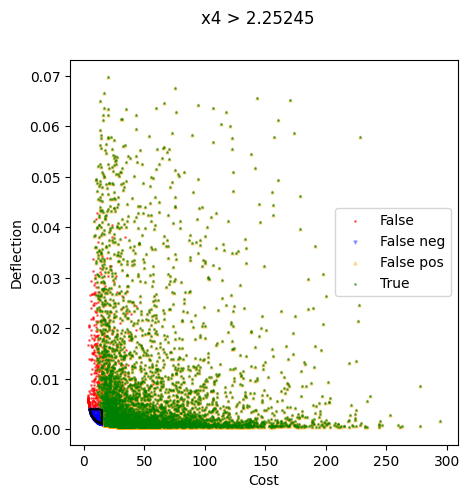

In [13]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_beam["mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "mark", "category", target_category, title=rule)